# Baseline Model

## Table of Contents
1. [Model Choice](#model-choice)
2. [Feature Selection](#feature-selection)
3. [Implementation](#implementation)
4. [Evaluation](#evaluation)


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_decision_forests as tfdf
#import ydf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
# Import your chosen baseline model
# Example: from sklearn.linear_model import LogisticRegression


Old code
import tensorflow_decision_forests as tfdf

tf_ds = tfdf.keras.pd_dataframe_to_tf_dataset(ds, label="l")
model = tfdf.keras.RandomForestModel(label="l")
model.fit(tf_ds)

New code
import ydf

model = ydf.RandomForestLearner(label="l").train(ds)


## Model Choice

[Explain why you've chosen a particular model as the baseline. This could be a simple statistical model or a basic machine learning model. Justify your choice.]


## Feature Selection

[Indicate which features from the dataset you will be using for the baseline model, and justify your selection.]


In [52]:
# Load the dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('Elmshorn_2params_wo0.csv', delimiter=';')

# Convert comma-separated strings to float
#df = df.apply(lambda col: col.str.replace(',', '.').astype(float) if col.dtype == 'object' else col)

# Feature selection
#y = df['Power_Generation_[kWh]']
#X = df[['Tavg', 'Sol']]

#n_x=X/100
#n_y=y/100

# Splitting the dataset
#X_train, X_test, y_train, y_test = train_test_split(n_x, n_y, test_size=0.2, random_state=42)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [53]:
# Convert comma-separated strings to float in train_df and test_df
train_df = train_df.apply(lambda col: col.str.replace(',', '.').astype(float) if col.dtype == 'object' else col)
test_df = test_df.apply(lambda col: col.str.replace(',', '.').astype(float) if col.dtype == 'object' else col)

# Now recreate the datasets with proper float types
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='Power_Generation_[kWh]', task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label='Power_Generation_[kWh]', task=tfdf.keras.Task.REGRESSION)


## Implementation

[Implement your baseline model here.]



In [54]:
# Train the model
model = tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.REGRESSION,verbose=2)
model.fit(train_ds)

Use 8 thread(s) for training
Use /var/folders/g3/9v4gs6r57_7_bc8nsrqdz_t40000gn/T/tmpr74giems as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Tavg': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Sol': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>}
Label: Tensor("data_2:0", shape=(None,), dtype=float64)
Weights: None
Normalized tensor features:
 {'Tavg': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Sol': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>)}


W0000 00:00:1765400370.536944 13696757 gradient_boosted_trees.cc:1873] "goss_alpha" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1765400370.536979 13696757 gradient_boosted_trees.cc:1883] "goss_beta" set but "sampling_method" not equal to "GOSS".
W0000 00:00:1765400370.536981 13696757 gradient_boosted_trees.cc:1897] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.110143. Found 617 examples.
Training model...
Model trained in 0:00:00.063572
Compiling model...
Model compiled.


In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the model and capture metrics
evaluation_results = model.evaluate(test_ds)
print("\nEvaluation Results:")
print(evaluation_results)

# For more detailed predictions
predictions = model.predict(test_ds)
print("\nPredictions shape:", predictions.shape)
print("First 10 predictions:", predictions[:10])

# Calculate MSE and MAE manually for clarity
y_pred = model.predict(test_ds).flatten()
y_true = test_df['Power_Generation_[kWh]'].values

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print(f"\nMean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

1/1 [==============================] - 0s 45ms/step - loss: 0.0000e+00

Evaluation Results:
0.0
1/1 [==============================] - 0s 22ms/step

Predictions shape: (155, 1)
First 10 predictions: [[21.316492 ]
 [11.999795 ]
 [25.993618 ]
 [14.2071705]
 [10.07242  ]
 [22.539597 ]
 [ 5.3251014]
 [28.318483 ]
 [17.55099  ]
 [42.41863  ]]
1/1 [==============================] - 0s 21ms/step

Mean Squared Error (MSE): 21.025633688796553
Mean Absolute Error (MAE): 3.420036309611412


## Evaluation

[Clearly state what metrics you will use to evaluate the model's performance. These metrics will serve as a starting point for evaluating more complex models later on.]



In [ ]:
# Evaluate the baseline model
model.evaluate(test_ds)

1/1 [==============================] - 0s 79ms/step - loss: 0.0000e+00


0.0

In [50]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0)
model.summary()

Model: "gradient_boosted_trees_model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: REGRESSION
Label: "__LABEL"

Input Features (2):
	Sol
	Tavg

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.  "Sol"  1.000000 ################
    2. "Tavg"  0.236718 

Variable Importance: NUM_AS_ROOT:
    1. "Sol" 34.000000 

Variable Importance: NUM_NODES:
    1.  "Sol" 500.000000 ################
    2. "Tavg" 349.000000 

Variable Importance: SUM_SCORE:
    1.  "Sol" 499724.779395 ################
    2. "Tavg" 18890.035593 



Loss: SQUARED_ERROR
Validation loss value: 3.96481
Number of trees per iteration: 1
Node format: NOT_SET
Number of trees: 34
Total number of nodes: 1732

Number of nodes by tree:


In [59]:
import matplotlib.pyplot as plt

# Extract true labels from test_df
y_true = test_df['Power_Generation_[kWh]'].values

# Generate predictions (NumPy array)
y_pred = model.predict(test_ds).flatten()


1/1 [==============================] - 0s 26ms/step


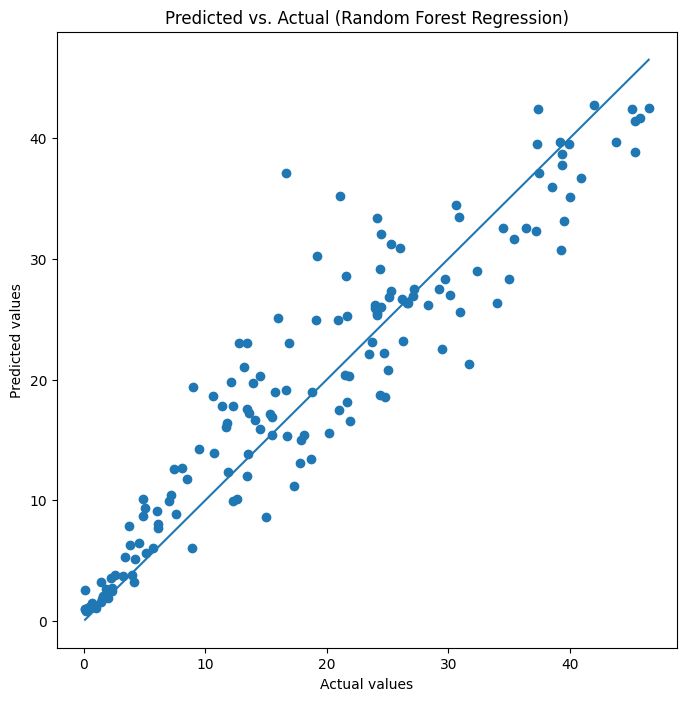

In [60]:
plt.figure(figsize=(8,8))

plt.scatter(y_true, y_pred)  # Predicted vs Actual
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs. Actual (Random Forest Regression)")

# Optional reference line for perfect predictions
min_val = min(y_true.min(), y_pred.min())
max_val = max(y_true.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])

plt.show()
